In [1]:
import pandas as pd
import numpy as np

In [2]:
# 경고 메세지 무시
import warnings
warnings.filterwarnings(action="ignore")

# 할당 받은 데이터 EDA

In [3]:
#데이터 로드
cow_disease = pd.read_excel("C:/Users/joyh1/Desktop/DSC/DSC_음메/cow_data/가축질병발생정보.xlsx")
#weather = pd.read_csv("C:/Users/joyh1/Desktop/DSC/DSC_음메/cow_data/관측데이터.csv", encoding='utf-8')
cow_price = pd.read_excel("C:/Users/joyh1/Desktop/DSC/DSC_음메/cow_data/축산물 실시간 경매시황중계정보.xlsx")

## 가축질병발생정보 데이터

In [4]:
cow_disease.shape

(41024, 12)

In [5]:
# 우선 결측치 값은 없음!
cow_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41024 entries, 0 to 41023
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   전염병발생번호       41024 non-null  int64 
 1   가축전염병명        41024 non-null  object
 2   농장명(농장주)      41024 non-null  object
 3   농장소재지 법정동 코드  41024 non-null  int64 
 4   농장소재지         41024 non-null  object
 5   발생일자(잔단일)     41024 non-null  int64 
 6   축품종 코드        41024 non-null  int64 
 7   축종(품종)        41024 non-null  object
 8   발생두수(마리)      41024 non-null  int64 
 9   진단기관코드        41024 non-null  object
 10  진단기관          41024 non-null  object
 11  종식일           41024 non-null  object
dtypes: int64(5), object(7)
memory usage: 3.8+ MB


In [6]:
# 객체타입 데이터 기술통계량 보기
cow_disease.describe(include="object")

,가축전염병명,농장명(농장주),농장소재지,축종(품종),진단기관코드,진단기관,종식일
count,41024,41024,41024,41024,41024,41024,41024
unique,15,18749,8184,60,133,98,2047
top,브루셀라병,,전라북도 익산시 왕궁면 온수리,소-한우,6460117,전남 축산기술연구소,
freq,23607,961,446,26845,2458,2458,31989


In [7]:
cow_disease.head()

,전염병발생번호,가축전염병명,농장명(농장주),농장소재지 법정동 코드,농장소재지,발생일자(잔단일),축품종 코드,축종(품종),발생두수(마리),진단기관코드,진단기관,종식일
0,166059,결핵병,박택상,4790039021,경상북도 예천군 개포면 금리,21071030,412002,소-한우,1,6430838,충북 중부지소,
1,54842,낭충봉아부패병,이선우,4682033031,전라남도 해남군 현산면 조산리,20200408,418600,벌-재래종,90,6460950,전남 동물위생시험소,
2,214807,결핵병,이천호,4148011200,경기도 파주시 산남동,20200403,412004,소-젖소,5,6412103,경기 북부 동물위생시험소,
3,54811,낭충봉아부패병,이칠성,4615037021,전라남도 순천시 외서면 신덕리,20200403,418600,벌-재래종,17,6460950,전남 동물위생시험소,
4,214689,결핵병,내구,4167034026,경기도 여주시 능서면 용은리,20200402,412003,소-육우,1,6412106,경기 동부지소,


In [8]:
# 데이터 변수명 간단하게 바꾸기
df = cow_disease.copy()

In [9]:
# "축종(품종)" 칼럼에서 '소'가 포함되어 있는 행들만 갖고와보자
df_cow = df[df['축종(품종)'].str.contains("소")]
print(f" - 소 질환 관련 데이터 갯수 : {df_cow.shape}")
df_cow.head()

# 원본데이터 4만개 에서 '소'가 걸린 질병에 관련 데이터는 3만3천개 => 매우 대부분 소 질환과 연관되어 있음

 - 소 질환 관련 데이터 갯수 : (33032, 12)


,전염병발생번호,가축전염병명,농장명(농장주),농장소재지 법정동 코드,농장소재지,발생일자(잔단일),축품종 코드,축종(품종),발생두수(마리),진단기관코드,진단기관,종식일
0,166059,결핵병,박택상,4790039021,경상북도 예천군 개포면 금리,21071030,412002,소-한우,1,6430838,충북 중부지소,
2,214807,결핵병,이천호,4148011200,경기도 파주시 산남동,20200403,412004,소-젖소,5,6412103,경기 북부 동물위생시험소,
4,214689,결핵병,내구,4167034026,경기도 여주시 능서면 용은리,20200402,412003,소-육우,1,6412106,경기 동부지소,
5,214806,결핵병,박영훈,4148025623,경기도 파주시 법원읍 가야리,20200402,412004,소-젖소,1,6412103,경기 북부 동물위생시험소,
6,214597,결핵병,대도축산,4688034025,전라남도 장성군 삼서면 대도리,20200331,412002,소-한우,1,6460950,전남 동물위생시험소,


In [10]:
# 소는 어떤 질환에 가장 많이 걸릴까?
df_cow['가축전염병명'].value_counts()

브루셀라병           23602
결핵병              9280
구제역               147
낭충봉아부패병             2
고병원성 조류인플루엔자        1
Name: 가축전염병명, dtype: int64

---
 **소가 가장 많이 걸리는 전염병 **
 
1. 브루셀라병
2. 결핵병
3. 구제역
---

### 질병으로부터 이끌어낼 수 있는 결론

- **브루셀라병**
    * 우선 압도적으로 가장 많이 걸리는 질환임
    * 임신을 하는 소에 주로 걸리고 거세한우는 거의 걸리지 않음!
    * 브루셀라균 자체가 저항성이 매우강하므로(직사광선에서도) `기온이 높다한들` 브루셀라균을 막지 못함!
    * 브루셀라병은 어떻게 할 수가 없음...그냥 똑같이 가중치 부여해야할듯...! 
---
- **소 결핵**
    * 결핵은 호흡기로 감염되는 질환이라 성별에 상관없이 모든 소가 걸릴 가능성 동일
    * 결핵균이 햇빛, 건조한 조건에 쉽게 사멸되고 춥고, 습한곳에서 오래생존하므로 **`기온변수`** 에 따라 가중치부여!
---
- **구제역**
    * 자주 일어나지 않는 전염병(뉴스에서도 가끔 보듯이 만성질환은 아님)
    * 바이러스는 자외선이 강할 경우 자연적 살균 가능, 습도 60%미만일 때 빠른속도로 사멸 -> 장마철과 기온이 높은 `여름`엔 발생 잘 안할듯! **`기온변수`** 에 따라 가중치부여!
---   
- *고려해야 할 사항*
    * 구제역 같은 경우 습도 60%라는 객관적인 수치가 정해져있지만 다른 질병의 **`습한곳은 습도 기준을 어떻게 설정!?`**
    * 위 3가지 질환의 공통적인 사안으로서 `기온이 높다, 자외선이 강할경우` 이 때 **`객관적인 기온(온도) 수치나 범위를 어떻게 설정한 것인가!?`**
---
- 브루셀라병 :  하지만 우리가 가져올 소 개체수가 우리는 암+수소 구분하지 않으며 암소가 훨씬 비율이 더 많고 질병의 특성상
    백신으로 예방률은 80프로 내외이지만 걸리는 순간 치료가 거의 불가, 병에 걸린 소가 해당 농가의 1/3이상이면 모두 살처분(보상금은 받긴함). 따라서 우리의 소 개체수 데이터 특성상 암소비율이 많으므로 브루셀라병으로 인한 `소 가격 감소`에 가중치 부여해야 할듯
    
- 구제역, 소 결핵 : 기온범위와 습도범위 설정

- 기온 :  30～35℃의 고온이 12일간 지속되면 폐사위험 가능성 높
  

In [11]:
df_cow.head(1)

,전염병발생번호,가축전염병명,농장명(농장주),농장소재지 법정동 코드,농장소재지,발생일자(잔단일),축품종 코드,축종(품종),발생두수(마리),진단기관코드,진단기관,종식일
0,166059,결핵병,박택상,4790039021,경상북도 예천군 개포면 금리,21071030,412002,소-한우,1,6430838,충북 중부지소,


In [12]:
# 대표적인 3가지 전염병에 해당하는 데이터만 가져오기
df_cow = df_cow[df_cow['가축전염병명'].str.contains("결핵|브루셀라|구제역")].copy()
print(df_cow.shape)
print()
df_cow.head()

(33029, 12)



,전염병발생번호,가축전염병명,농장명(농장주),농장소재지 법정동 코드,농장소재지,발생일자(잔단일),축품종 코드,축종(품종),발생두수(마리),진단기관코드,진단기관,종식일
0,166059,결핵병,박택상,4790039021,경상북도 예천군 개포면 금리,21071030,412002,소-한우,1,6430838,충북 중부지소,
2,214807,결핵병,이천호,4148011200,경기도 파주시 산남동,20200403,412004,소-젖소,5,6412103,경기 북부 동물위생시험소,
4,214689,결핵병,내구,4167034026,경기도 여주시 능서면 용은리,20200402,412003,소-육우,1,6412106,경기 동부지소,
5,214806,결핵병,박영훈,4148025623,경기도 파주시 법원읍 가야리,20200402,412004,소-젖소,1,6412103,경기 북부 동물위생시험소,
6,214597,결핵병,대도축산,4688034025,전라남도 장성군 삼서면 대도리,20200331,412002,소-한우,1,6460950,전남 동물위생시험소,


In [13]:
# 필요한 칼럼만 얻기
columns = ['가축전염병명','발생일자(잔단일)','축종(품종)','발생두수(마리)']
df_cow = df_cow[columns].copy()
df_cow.head()

,가축전염병명,발생일자(잔단일),축종(품종),발생두수(마리)
0,결핵병,21071030,소-한우,1
2,결핵병,20200403,소-젖소,5
4,결핵병,20200402,소-육우,1
5,결핵병,20200402,소-젖소,1
6,결핵병,20200331,소-한우,1


In [14]:
from IPython.display import Image

- 육우란, 국내법상 한우고기와 젖소고기를 제외한 모든 쇠고기를 의미합니다만, 대부분 고기생산을 주목적으로 사육된 얼룩소 수소를 말합니다.

In [16]:
# 따라서 우리는 축종(품종)에서 '소-젖소','소-육우'를 제외해야 한다. 
df_kcow = df_cow[~df_cow['축종(품종)'].str.contains("육우|젖소")]
df_kcow

,가축전염병명,발생일자(잔단일),축종(품종),발생두수(마리)
0,결핵병,21071030,소-한우,1
6,결핵병,20200331,소-한우,1
14,브루셀라병,20200323,소-한우,2
18,결핵병,20200319,소-한우,2
19,결핵병,20200319,소-한우,4
...,...,...,...,...
40922,결핵병,20000218,소,4
40960,결핵병,20000120,소,3
40965,결핵병,20000119,소,2
40976,결핵병,20000113,소,1


In [17]:
# 축종(품종) 값들 뭐 있는지 살펴보기
df_kcow['축종(품종)'].unique()

array(['소-한우', '소-비분류', '소-유산태아', '소-기타', '소-교잡우', '소'], dtype=object)

In [18]:
# '소-한우'만 가져오자
df_kcow = df_kcow[df_kcow['축종(품종)'] == '소-한우'].copy()
df_kcow
# 소-비분류, 기타등등 포함한 데이터는 약 1000개정도밖에 되지 않음

,가축전염병명,발생일자(잔단일),축종(품종),발생두수(마리)
0,결핵병,21071030,소-한우,1
6,결핵병,20200331,소-한우,1
14,브루셀라병,20200323,소-한우,2
18,결핵병,20200319,소-한우,2
19,결핵병,20200319,소-한우,4
...,...,...,...,...
40797,구제역,20000404,소-한우,10
40798,구제역,20000404,소-한우,20
40812,브루셀라병,20000327,소-한우,2
40816,브루셀라병,20000327,소-한우,9


In [19]:
# 데이터 속성(칼럼)별 타입보기
df_kcow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26842 entries, 0 to 40853
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   가축전염병명     26842 non-null  object
 1   발생일자(잔단일)  26842 non-null  int64 
 2   축종(품종)     26842 non-null  object
 3   발생두수(마리)   26842 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.0+ MB


In [20]:
# 발생일자 잘못들어간 값 수정 
df_kcow['발생일자(잔단일)'] = df_kcow['발생일자(잔단일)'].replace(21071030,20171030)
df_kcow.head()

,가축전염병명,발생일자(잔단일),축종(품종),발생두수(마리)
0,결핵병,20171030,소-한우,1
6,결핵병,20200331,소-한우,1
14,브루셀라병,20200323,소-한우,2
18,결핵병,20200319,소-한우,2
19,결핵병,20200319,소-한우,4


In [21]:
df_kcow['발생일자'] = pd.to_datetime(df_kcow['발생일자(잔단일)'].astype(str))

In [22]:
df_kcow

,가축전염병명,발생일자(잔단일),축종(품종),발생두수(마리),발생일자
0,결핵병,20171030,소-한우,1,2017-10-30
6,결핵병,20200331,소-한우,1,2020-03-31
14,브루셀라병,20200323,소-한우,2,2020-03-23
18,결핵병,20200319,소-한우,2,2020-03-19
19,결핵병,20200319,소-한우,4,2020-03-19
...,...,...,...,...,...
40797,구제역,20000404,소-한우,10,2000-04-04
40798,구제역,20000404,소-한우,20,2000-04-04
40812,브루셀라병,20000327,소-한우,2,2000-03-27
40816,브루셀라병,20000327,소-한우,9,2000-03-27


In [23]:
# 필요없는 진단일 칼럼삭제
df_kcow = df_kcow.drop(['발생일자(잔단일)'], axis=1)
print(df_kcow.info())
df_kcow

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26842 entries, 0 to 40853
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   가축전염병명    26842 non-null  object        
 1   축종(품종)    26842 non-null  object        
 2   발생두수(마리)  26842 non-null  int64         
 3   발생일자      26842 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.0+ MB
None


,가축전염병명,축종(품종),발생두수(마리),발생일자
0,결핵병,소-한우,1,2017-10-30
6,결핵병,소-한우,1,2020-03-31
14,브루셀라병,소-한우,2,2020-03-23
18,결핵병,소-한우,2,2020-03-19
19,결핵병,소-한우,4,2020-03-19
...,...,...,...,...
40797,구제역,소-한우,10,2000-04-04
40798,구제역,소-한우,20,2000-04-04
40812,브루셀라병,소-한우,2,2000-03-27
40816,브루셀라병,소-한우,9,2000-03-27


In [24]:
# 데이터 해당기간(2013-01-01 ~ 2018-12-31)만 출력
df_kcow = df_kcow[df_kcow['발생일자'].isin(pd.date_range(start='2013-01-01', end='2018-12-31'))].copy()
df_kcow

,가축전염병명,축종(품종),발생두수(마리),발생일자
0,결핵병,소-한우,1,2017-10-30
1772,결핵병,소-한우,1,2018-12-28
1774,결핵병,소-한우,1,2018-12-27
1775,결핵병,소-한우,2,2018-12-27
1776,결핵병,소-한우,5,2018-12-27
...,...,...,...,...
9737,결핵병,소-한우,1,2013-01-04
9738,결핵병,소-한우,1,2013-01-04
9739,결핵병,소-한우,1,2013-01-04
9740,결핵병,소-한우,1,2013-01-04


In [25]:
# 결핵병, 브루셀라병, 구제역 별로 데이터프레임을 쪼개자!
df_kcow['가축전염병명'].unique()

array(['결핵병', '브루셀라병', '구제역'], dtype=object)

In [26]:
# tuber(culosis) : 결핵 
# bru(cellosis) : 브루셀라병
# guje : 구제역
df_tuber = df_kcow[df_kcow['가축전염병명'] == '결핵병']
df_bru = df_kcow[df_kcow['가축전염병명'] == '브루셀라병']
df_guje = df_kcow[df_kcow['가축전염병명'] == '구제역']

print(df_tuber.head(5))
print()
print(df_bru.head(5))
print()
print(df_guje.head(5))

     가축전염병명 축종(품종)  발생두수(마리)       발생일자
0       결핵병   소-한우         1 2017-10-30
1772    결핵병   소-한우         1 2018-12-28
1774    결핵병   소-한우         1 2018-12-27
1775    결핵병   소-한우         2 2018-12-27
1776    결핵병   소-한우         5 2018-12-27

     가축전염병명 축종(품종)  발생두수(마리)       발생일자
1783  브루셀라병   소-한우         1 2018-12-26
1795  브루셀라병   소-한우         1 2018-12-20
1806  브루셀라병   소-한우         1 2018-12-19
1813  브루셀라병   소-한우         2 2018-12-17
1828  브루셀라병   소-한우         9 2018-12-13

     가축전염병명 축종(품종)  발생두수(마리)       발생일자
4655    구제역   소-한우         6 2017-02-14
4656    구제역   소-한우         1 2017-02-14
4658    구제역   소-한우         3 2017-02-13
4660    구제역   소-한우         3 2017-02-12
4661    구제역   소-한우         1 2017-02-11


In [27]:
# 날짜별로 정렬하기 
df_tuber = df_tuber.sort_values(by=['발생일자'])
df_bru = df_bru.sort_values(by=['발생일자'])
df_guje = df_guje.sort_values(by=['발생일자'])

print(df_tuber.head(5))
print()
print(df_bru.head(5))
print()
print(df_guje.head(5))

     가축전염병명 축종(품종)  발생두수(마리)       발생일자
9742    결핵병   소-한우         1 2013-01-02
9736    결핵병   소-한우         1 2013-01-04
9737    결핵병   소-한우         1 2013-01-04
9740    결핵병   소-한우         1 2013-01-04
9739    결핵병   소-한우         1 2013-01-04

     가축전염병명 축종(품종)  발생두수(마리)       발생일자
9713  브루셀라병   소-한우         2 2013-01-14
9712  브루셀라병   소-한우         1 2013-01-14
9701  브루셀라병   소-한우         1 2013-01-18
9699  브루셀라병   소-한우         2 2013-01-21
9690  브루셀라병   소-한우        12 2013-01-24

     가축전염병명 축종(품종)  발생두수(마리)       발생일자
7281    구제역   소-한우         1 2015-01-06
7160    구제역   소-한우         1 2015-01-31
7132    구제역   소-한우         1 2015-02-05
7120    구제역   소-한우         1 2015-02-06
6761    구제역   소-한우         2 2015-04-28


### 연도, 월별 결핵병 추세 확인

In [28]:
df_tuber.head()

,가축전염병명,축종(품종),발생두수(마리),발생일자
9742,결핵병,소-한우,1,2013-01-02
9736,결핵병,소-한우,1,2013-01-04
9737,결핵병,소-한우,1,2013-01-04
9740,결핵병,소-한우,1,2013-01-04
9739,결핵병,소-한우,1,2013-01-04


In [29]:
import matplotlib.pyplot as plt
plt.rc("font",family="Malgun Gothic")

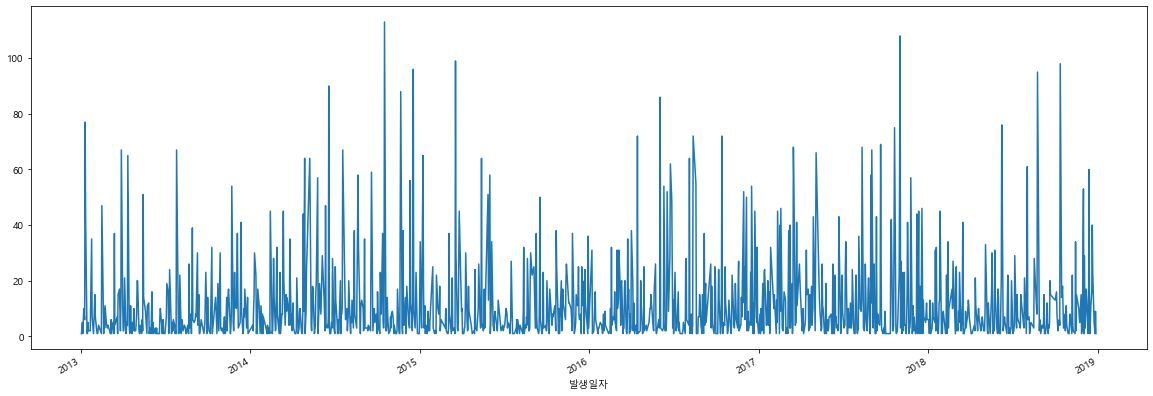

In [30]:
# 연도 전체를 가지고 추세를 탐색하기엔 무리가 있다 -> 연도별로 데이터프레임 쪼개서 월별로 살펴보자.
tuber_count  = df_tuber.groupby(['발생일자'])['발생두수(마리)'].sum()
tuber_count.plot(figsize=(20,7))

In [31]:
# 우선 연도, 월 칼럼 새로 만들자
df_tuber['연도'] = df_tuber['발생일자'].dt.year
df_tuber['월'] = df_tuber['발생일자'].dt.month
df_tuber.head()

,가축전염병명,축종(품종),발생두수(마리),발생일자,연도,월
9742,결핵병,소-한우,1,2013-01-02,2013,1
9736,결핵병,소-한우,1,2013-01-04,2013,1
9737,결핵병,소-한우,1,2013-01-04,2013,1
9740,결핵병,소-한우,1,2013-01-04,2013,1
9739,결핵병,소-한우,1,2013-01-04,2013,1


In [32]:
# 연도별로 데이터프레임 나누기
tuber_2013 = df_tuber[df_tuber['연도'] == 2013] 
tuber_2014 = df_tuber[df_tuber['연도'] == 2014]
tuber_2015 = df_tuber[df_tuber['연도'] == 2015]
tuber_2016 = df_tuber[df_tuber['연도'] == 2016]
tuber_2017 = df_tuber[df_tuber['연도'] == 2017]
tuber_2018 = df_tuber[df_tuber['연도'] == 2018]

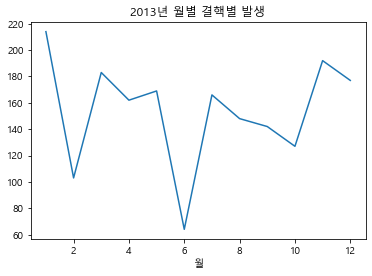

In [33]:
# 2013년 월별 결학병 발생 추세 보기
d = tuber_2013.groupby(['월'])['발생두수(마리)'].sum()
g = d.plot(title="2013년 월별 결핵별 발생")

In [34]:
df_tuber['연도'].value_counts()

# 연도별로 데이터 갯수 차이

2017    742
2018    696
2014    659
2016    584
2015    540
2013    520
Name: 연도, dtype: int64

In [35]:
import seaborn as sns

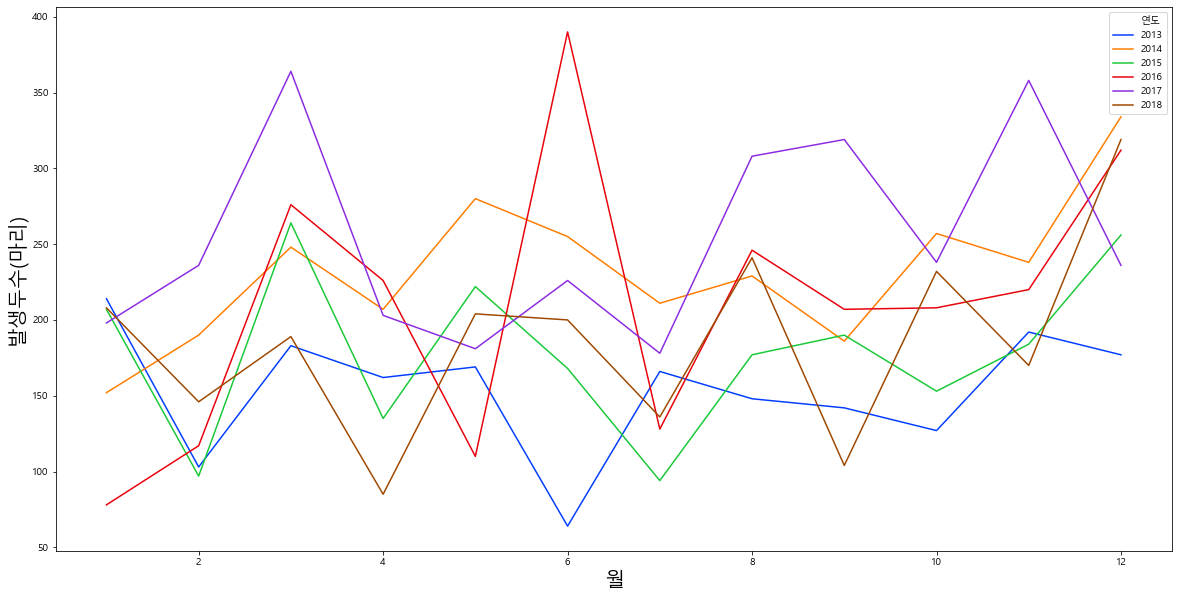

In [69]:
# 연도가 너무 많아서 seaborn으로 한번에 시각화
plt.figure(figsize=(20,10))
plt.xlabel("월", fontsize=20)
plt.ylabel("발생두수(마리)", fontsize=20)
sns.lineplot(data=df_tuber, x='월', y='발생두수(마리)', estimator='sum', hue='연도', ci=None,palette='bright')

In [36]:
df_tuber[['연도','발생두수(마리)']].describe()

,연도,발생두수(마리)
count,3741.000000,3741.000000
mean,2015.656776,3.896819
std,1.710404,7.468547
min,2013.000000,0.000000
25%,2014.000000,1.000000
50%,2016.000000,1.000000
75%,2017.000000,3.000000
max,2018.000000,102.000000


- <결핵병> 그래프로 도출할 수 있는 추세
    - 2013년 : 다른 연도에 비해서 제일 낮음 특출나게 많이 발생했던 월도 없음 그나마 높았던월은 **3월, 5월, 7월, 11월**
    - 2014년 : **3월, 5월, 10월, 12월(가장높음)** 총 4개의 월에서 높은 발생률 보임
    - 2015년 : **3월(가장높음), 5월, 12월** 총 3개의 월에서 높은 발생률 보임
    - 2016년 : **3월, 6월(가장높음), 8월, 12월** 총 4개의 월에서 높은 발생률 보임
    - 2017년 : **3월, 8월, 9월, 11월** 총 4개의 월에서 높은 발생률 보임(기본적으로 2017년 한 해동안 발생률 높았음)
    - 2018년 : 2013년이랑 비슷한 낮은 추세를 보임. **8월, 10월, 12월** 총 3개의 월에서 높은발생률 보임
---
* 가장 많이 높았던 월
    - 3월(2013, 2014, 2015, 2016, 2017) 4
    - 5월(2013, 2014, 2015) 3
    - 6월(2016) 1
    - 7월(2013) 1
    - 8월(2016, 2017, 2018) 3
    - 9월(2017) 1 
    - 10월(2014, 2018) 2
    - 11월(2013, 2017) 2 
    - 12월(2014, 2015, 2016, 2018) 4
---
* 가중치를 주어야 할 월 : **`3월,5월,8월,12월`** => 주관적인 의견..

### 연도,월별 브루셀라병 추세 확인

In [37]:
df_bru['연도'] = df_bru['발생일자'].dt.year
df_bru['월'] = df_bru['발생일자'].dt.month
df_bru.head()

,가축전염병명,축종(품종),발생두수(마리),발생일자,연도,월
9713,브루셀라병,소-한우,2,2013-01-14,2013,1
9712,브루셀라병,소-한우,1,2013-01-14,2013,1
9701,브루셀라병,소-한우,1,2013-01-18,2013,1
9699,브루셀라병,소-한우,2,2013-01-21,2013,1
9690,브루셀라병,소-한우,12,2013-01-24,2013,1


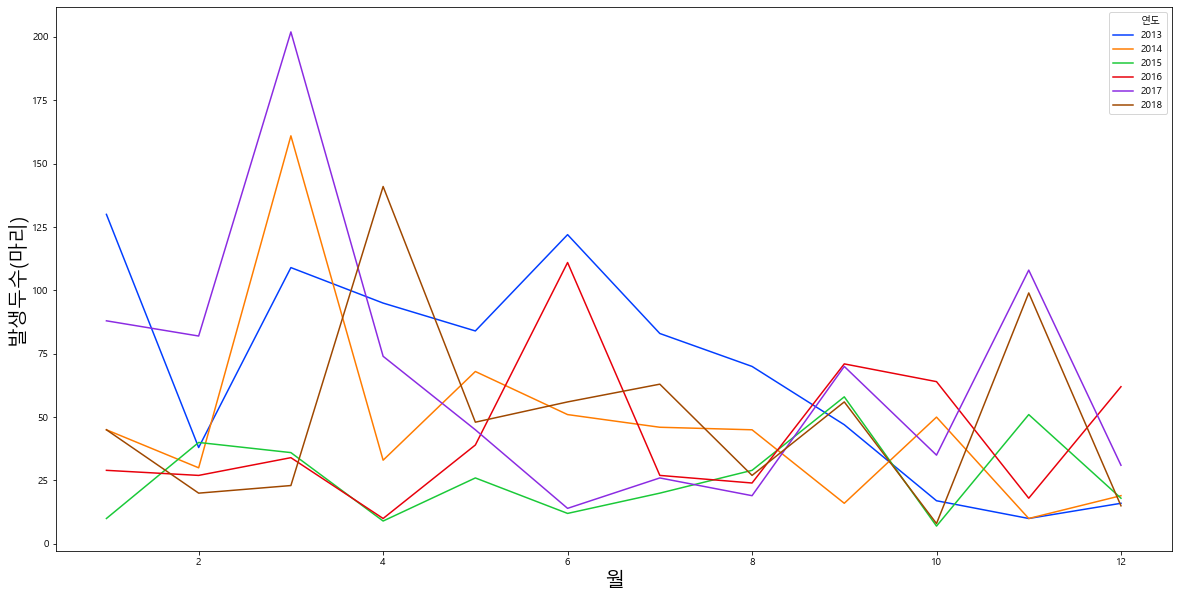

In [74]:
# 연도, 월 별로 브루셀라병 추세 확인
plt.figure(figsize=(20,10))
plt.xlabel("월",fontsize=20)
plt.ylabel("발생두수(마리)", fontsize=20)
sns.lineplot(data=df_bru, x='월', y='발생두수(마리)', estimator='sum', ci=None, hue='연도', palette='bright')

* <브루셀라병> 그래프로 얻을 수 있는 추세
    - 2013년 : **3월, 6월**이 가장 높음(1월은 제외, 왜냐 2012년 데이터에서 이어져온 추세이기 때문..오히려 2013년 12월로 갈수록 낮아진다..)
    - 2014년 : **3월**이 가장 높았고 나머지는 평이..
    - 2015년 : 대체적으로 발생률이 매우 낮지만 **9월, 11월**은 잠깐 상승했었음.
    - 2016년 : 대체로 낮다가 **6월, 9월~10월** 에 잠깐 상승했었음.
    - 2017년 : **2월~4월** 에 매우 높았고 **11월**에 또 크게 상승했었음.
    - 2018년 : **4월**에 갑작스럽게 높아졌고 **11월**에 또 크게 상승했었음.
---
* 가장 증가세가 높았던 월 => 가중치 주어야할 월
    - 2월~4월
    - 5월~6월
    - 10월~11월

### 연도, 월별 구제역 추세 확인

In [38]:
df_guje['연도'] = df_guje['발생일자'].dt.year
df_guje['월'] = df_guje['발생일자'].dt.month
df_guje.head()

,가축전염병명,축종(품종),발생두수(마리),발생일자,연도,월
7281,구제역,소-한우,1,2015-01-06,2015,1
7160,구제역,소-한우,1,2015-01-31,2015,1
7132,구제역,소-한우,1,2015-02-05,2015,2
7120,구제역,소-한우,1,2015-02-06,2015,2
6761,구제역,소-한우,2,2015-04-28,2015,4


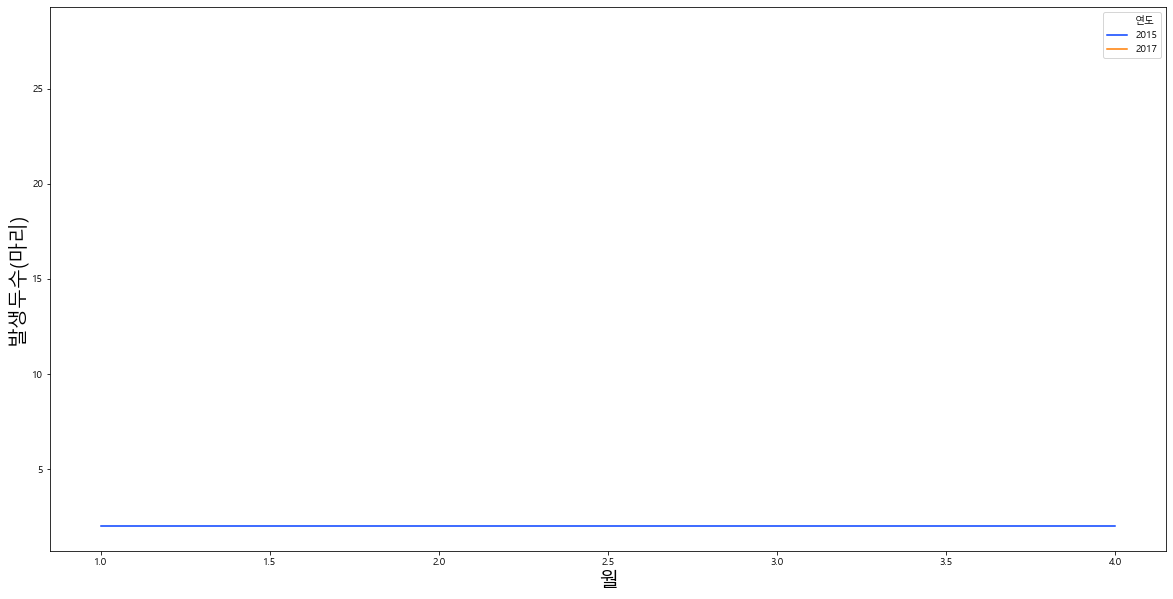

In [83]:
# 연도, 월 별로 구제역 추세 확인
plt.figure(figsize=(20,10))
plt.xlabel("월",fontsize=20)
plt.ylabel("발생두수(마리)", fontsize=20)
sns.lineplot(data=df_guje, x='월', y='발생두수(마리)', estimator='sum', ci=None, hue='연도', palette='bright')

# 구제역 데이터갯수가 너무적어...

In [39]:
print(df_guje.shape)
df_guje

# 데이터갯수 13개밖에 안됨..

(13, 6)


,가축전염병명,축종(품종),발생두수(마리),발생일자,연도,월
7281,구제역,소-한우,1,2015-01-06,2015,1
7160,구제역,소-한우,1,2015-01-31,2015,1
7132,구제역,소-한우,1,2015-02-05,2015,2
7120,구제역,소-한우,1,2015-02-06,2015,2
6761,구제역,소-한우,2,2015-04-28,2015,4
4684,구제역,소-한우,4,2017-02-07,2017,2
4673,구제역,소-한우,5,2017-02-09,2017,2
4674,구제역,소-한우,5,2017-02-09,2017,2
4661,구제역,소-한우,1,2017-02-11,2017,2
4660,구제역,소-한우,3,2017-02-12,2017,2


* 셀 수 있는 구제역 데이터를 통해서 가장 많이 발생하는 월(month) 판단
    - 압도적으로 2017년에 **2월**이 많음. 다음은 2015년 1월(2개) , 2015년 4월은 1번밖에...
    - 이 데이터만으로 **2월** 가중치를 주어야할까? 
    
    *여러분 의견부탁드려요..!*

## 소 경매+지육상장 가격 데이터 EDA

In [40]:
cow_price.head(2)

,경매시간,경매기준시분초,경매 구분,경매 구분 명,도매시장코드,도매시장명,한우 평균경매 금액,한우 평균경매 금액.1,한우 1B+ 경매단가,한우 3B 경매단가,...,육우 전날 경매금액 차이,육우 경매 예상 두수,육우 경매 두수,돼지 박피 경매 금액,돼지 박피 전날 경매금액 차이,돼지 박피 경매 두수,돼지 탕박 경매 금액,돼지 탕박 전날 경매금액 차이,돼지 탕박 경매 두수,돼지 경매 두수
0,20181007,235916,753003,경매용+지육상장,1201,신흥산업,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20181007,235916,753003,경매용+지육상장,0905,농협고령,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
cow_price.shape

(34957, 23)

In [42]:
cow_price.columns

Index(['경매시간', '경매기준시분초', '경매 구분', '경매 구분 명', '도매시장코드', '도매시장명', '한우 평균경매 금액',
       '한우 평균경매 금액.1', '한우 1B+ 경매단가', '한우 3B 경매단가', '한우 경매 예상 두수',
       '한우 경매 낙찰 두수', '육우 경매 금액', '육우 전날 경매금액 차이', '육우 경매 예상 두수', '육우 경매 두수',
       '돼지 박피 경매 금액', '돼지 박피 전날 경매금액 차이', '돼지 박피 경매 두수', '돼지 탕박 경매 금액',
       '돼지 탕박 전날 경매금액 차이', '돼지 탕박 경매 두수', '돼지 경매 두수'],
      dtype='object')

In [43]:
# 필요한 칼럼들만 얻기
columns = ['경매시간','도매시장명','경매기준시분초','경매 구분 명','한우 평균경매 금액','돼지 탕박 경매 금액']
price = cow_price[columns]
price.head()

,경매시간,도매시장명,경매기준시분초,경매 구분 명,한우 평균경매 금액,돼지 탕박 경매 금액
0,20181007,신흥산업,235916,경매용+지육상장,0,0
1,20181007,농협고령,235916,경매용+지육상장,0,0
2,20181007,김해축공,235916,경매용+지육상장,0,0
3,20181007,관성(홍성),235916,경매용+지육상장,0,0
4,20181007,농협음성,235916,경매용+지육상장,0,0


In [44]:
price['도매시장명'].unique()

array(['신흥산업', '농협고령', '김해축공', '관성(홍성)', '농협음성', '농협부천', '삼성식품(주)', '도드람',
       '협신식품', '전국', '제주축협', '삼호축산', '농협나주', '익산', '부경축공', '홍주미트', '삼성식품',
       '축림(익산)', '삼호축산(주)'], dtype=object)

In [45]:
# 도매시장명이 '전국인' 데이터행만 뽑기
price = price[price['도매시장명'] == '전국'].copy()
price.head()

,경매시간,도매시장명,경매기준시분초,경매 구분 명,한우 평균경매 금액,돼지 탕박 경매 금액
9,20181007,전국,235916,경매용+지육상장,0,0
27,20181003,전국,235928,경매용+지육상장,0,0
36,20180929,전국,235839,경매용+지육상장,0,0
45,20180925,전국,235851,경매용+지육상장,0,0
61,20180921,전국,235902,경매용+지육상장,16612,4369


In [46]:
# 경매 금액에 대한 기술통계량 보기
price[['한우 평균경매 금액','돼지 탕박 경매 금액']].describe()

,한우 평균경매 금액,돼지 탕박 경매 금액
count,2490.000000,2490.000000
mean,6974.716064,3014.148996
std,7084.675585,2111.586970
min,0.000000,0.000000
25%,0.000000,0.000000
50%,8664.500000,3698.000000
75%,13893.000000,4715.000000
max,20019.000000,6431.000000


In [47]:
# 결측치 여부 확인
price.isnull().sum()

# -> 결측치 없음!

경매시간           0
도매시장명          0
경매기준시분초        0
경매 구분 명        0
한우 평균경매 금액     0
돼지 탕박 경매 금액    0
dtype: int64

In [48]:
# '경매 구분 명'의 값 종류보고 우리가 목표로 하는 '경매용+지육상장'에 해당하는 행들만 추출
print(price['경매 구분 명'].unique())

# 경매??지육상장 -> 이건뭐지?

['경매용+지육상장' '지육상장용' '경매용']


In [49]:
# 경매+지육상장 에 해당하는 데이터들만 추출
price = price[price['경매 구분 명'] == '경매용+지육상장'].copy()
price['경매 구분 명'].unique()

array(['경매용+지육상장'], dtype=object)

In [50]:
price.head()

,경매시간,도매시장명,경매기준시분초,경매 구분 명,한우 평균경매 금액,돼지 탕박 경매 금액
9,20181007,전국,235916,경매용+지육상장,0,0
27,20181003,전국,235928,경매용+지육상장,0,0
36,20180929,전국,235839,경매용+지육상장,0,0
45,20180925,전국,235851,경매용+지육상장,0,0
61,20180921,전국,235902,경매용+지육상장,16612,4369


In [51]:
# 한우 평균경매 금액이 0이 아닌 데이터행만 갖고오기
ko_cow_price = price[price['한우 평균경매 금액'] != 0]
print(f"한우 평균 경매 금액이 '0'이 아닌 데이터 행,열 갯수 : {ko_cow_price.shape}")
ko_cow_price.head()

한우 평균 경매 금액이 '0'이 아닌 데이터 행,열 갯수 : (720, 6)


,경매시간,도매시장명,경매기준시분초,경매 구분 명,한우 평균경매 금액,돼지 탕박 경매 금액
61,20180921,전국,235902,경매용+지육상장,16612,4369
85,20180917,전국,235914,경매용+지육상장,17965,5641
90,20180913,전국,235926,경매용+지육상장,18757,5754
121,20180905,전국,235850,경매용+지육상장,18369,5548
136,20180901,전국,235902,경매용+지육상장,17108,5017


In [52]:
# 데이터 전처리를 하기 전 칼럼별 dtype 보기
ko_cow_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 61 to 34896
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   경매시간         720 non-null    int64 
 1   도매시장명        720 non-null    object
 2   경매기준시분초      720 non-null    int64 
 3   경매 구분 명      720 non-null    object
 4   한우 평균경매 금액   720 non-null    int64 
 5   돼지 탕박 경매 금액  720 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 39.4+ KB


In [53]:
# 경매시간을 Datetime으로 바꿔주기
# int -> datetime으로 바로 변환하면 이상하게 1970년으로만 변환됨..그래서 문자열로 변환후 datetime으로 변환
ko_cow_price['경매시간'] = ko_cow_price['경매시간'].astype(str)

In [54]:
ko_cow_price['경매시간'] = pd.to_datetime(ko_cow_price['경매시간'])
ko_cow_price.head()

,경매시간,도매시장명,경매기준시분초,경매 구분 명,한우 평균경매 금액,돼지 탕박 경매 금액
61,2018-09-21,전국,235902,경매용+지육상장,16612,4369
85,2018-09-17,전국,235914,경매용+지육상장,17965,5641
90,2018-09-13,전국,235926,경매용+지육상장,18757,5754
121,2018-09-05,전국,235850,경매용+지육상장,18369,5548
136,2018-09-01,전국,235902,경매용+지육상장,17108,5017


In [55]:
# 경매시간 날짜별로 재정렬
ko_cow_price = ko_cow_price.sort_values(by=['경매시간']).copy()
# 인덱스 재정리
ko_cow_price = ko_cow_price.reset_index(drop=True)
ko_cow_price.head()

,경매시간,도매시장명,경매기준시분초,경매 구분 명,한우 평균경매 금액,돼지 탕박 경매 금액
0,2013-01-02,전국,221544,경매용+지육상장,13203,3099
1,2013-01-03,전국,221545,경매용+지육상장,13743,3103
2,2013-01-04,전국,221545,경매용+지육상장,13945,2996
3,2013-01-07,전국,221547,경매용+지육상장,13470,3122
4,2013-01-08,전국,221548,경매용+지육상장,14040,3037


In [56]:
# 경매기준시분초 값 종류를 보고 경매시간대가 주로 언제인지를 살펴보기 위해서 앞에 두자리만 따오자.
ko_cow_price['경매기준시분초'] = ko_cow_price['경매기준시분초'].astype(str)
time_list = []
for i in ko_cow_price.index:
    time = ko_cow_price.loc[i, '경매기준시분초']
    time_list.append(time[0:2])
time_df = pd.DataFrame({"시간대":time_list})
time_df['시간대'].value_counts()

# 대략 경매 시간대는 21시~23시에 가장 많이 거래됨 (밤시간대)

22    527
23    162
21     18
90      9
15      2
16      1
17      1
Name: 시간대, dtype: int64

## 결핵병 발생과 소 경매가격과의 상관성 분석

In [57]:
# 결핵균 데이터프레임이랑 경매가격 데이터프레임이랑 merge하기 위해서 포맷 맞춰주자
ko_cow_price['연도'] = ko_cow_price['경매시간'].dt.year
ko_cow_price['월'] = ko_cow_price['경매시간'].dt.month
ko_cow_price.head()

,경매시간,도매시장명,경매기준시분초,경매 구분 명,한우 평균경매 금액,돼지 탕박 경매 금액,연도,월
0,2013-01-02,전국,221544,경매용+지육상장,13203,3099,2013,1
1,2013-01-03,전국,221545,경매용+지육상장,13743,3103,2013,1
2,2013-01-04,전국,221545,경매용+지육상장,13945,2996,2013,1
3,2013-01-07,전국,221547,경매용+지육상장,13470,3122,2013,1
4,2013-01-08,전국,221548,경매용+지육상장,14040,3037,2013,1


In [58]:
df_tuber.head()

,가축전염병명,축종(품종),발생두수(마리),발생일자,연도,월
9742,결핵병,소-한우,1,2013-01-02,2013,1
9736,결핵병,소-한우,1,2013-01-04,2013,1
9737,결핵병,소-한우,1,2013-01-04,2013,1
9740,결핵병,소-한우,1,2013-01-04,2013,1
9739,결핵병,소-한우,1,2013-01-04,2013,1


In [59]:
# 월(month)별로 맞추기가 가능한지 각 데이터프레임의 '월' 칼럼 값의 종류보기
print(f"ko_cow_price 월(month)값 종류 : {ko_cow_price['월'].unique()}")
print(f"df_tuber 월(month)값 종류 : {df_tuber['월'].unique()}")

# 두 데이터프레임 모두 1월~12월까지 존재한다

ko_cow_price 월(month)값 종류 : [ 1  2  3  4  5  6  7  8  9 10 11 12]
df_tuber 월(month)값 종류 : [ 1  2  3  4  5  6  7  8  9 10 11 12]


In [60]:
# 소 가격, 결핵병 데이터 연도, 월별로 묶고 merge하기
df_cow_price = pd.DataFrame(ko_cow_price.groupby(['연도','월'])['한우 평균경매 금액'].sum())
df_cow_price = df_cow_price.reset_index()
df_cow_price

,연도,월,한우 평균경매 금액
0,2013,1,314207
1,2013,2,255389
2,2013,3,235797
3,2013,4,258091
4,2013,5,258268
...,...,...,...
57,2018,5,83328
58,2018,6,102774
59,2018,7,102461
60,2018,8,88062


In [62]:
# 한우 평균경매 금액 월별 '평균(mean)값으로 만들기'
df_cow_price_mean = pd.DataFrame(ko_cow_price.groupby(['연도','월'])['한우 평균경매 금액'].mean())
df_cow_price_mean = df_cow_price_mean.reset_index().round()
df_cow_price_mean

,연도,월,한우 평균경매 금액
0,2013,1,13092.0
1,2013,2,12161.0
2,2013,3,11790.0
3,2013,4,11731.0
4,2013,5,11229.0
...,...,...,...
57,2018,5,16666.0
58,2018,6,17129.0
59,2018,7,17077.0
60,2018,8,17612.0


In [63]:
df_tuber_sum = pd.DataFrame(df_tuber.groupby(['연도','월'])['발생두수(마리)'].sum())
df_tuber_sum = df_tuber_sum.reset_index()
df_tuber_sum

,연도,월,발생두수(마리)
0,2013,1,214
1,2013,2,103
2,2013,3,183
3,2013,4,162
4,2013,5,169
...,...,...,...
67,2018,8,241
68,2018,9,104
69,2018,10,232
70,2018,11,170


### 한우 평균경매 금액의 연도, 월별 '합계' 금액 & 결핵병 발생두수와의 상관성 분석

In [64]:
# 행의 갯수가 많은 df_tuber로 left outer join 하기
df_price_tuber = pd.merge(df_tuber_sum, df_cow_price, how="outer", on=['연도','월'])
df_price_tuber

,연도,월,발생두수(마리),한우 평균경매 금액
0,2013,1,214,314207.0
1,2013,2,103,255389.0
2,2013,3,183,235797.0
3,2013,4,162,258091.0
4,2013,5,169,258268.0
...,...,...,...,...
67,2018,8,241,88062.0
68,2018,9,104,88811.0
69,2018,10,232,NaN
70,2018,11,170,NaN


In [65]:
# 결핵병 발생 마리수와 한우 평균경매 금액 상관성 보기
corr = df_price_tuber.corr()
corr.style.background_gradient()

,연도,월,발생두수(마리),한우 평균경매 금액
연도,1.000000,0.000000,0.181479,-0.738186
월,0.000000,1.000000,0.269640,-0.080929
발생두수(마리),0.181479,0.269640,1.000000,-0.067046
한우 평균경매 금액,-0.738186,-0.080929,-0.067046,1.000000


* 현재 결측치가 10개 있는 상태에서는 **`'한우 평균경매 금액'과 '결핵균발생두수(마리)' 상관성`** 은 -0.06으로 상관성이 미미함..
* 가장 상관성이 있어보이는 건 **`'연도'와 '한우 평균경매 금액'`** 이 -0.7로 음의 상관성이 큰 편

---
- 결측치 대체하고 상관성 비교를 해야할까!? => 피드백 부탁드립니다..!

### 한우 평균경매 금액의 연도, 월별 '평균' 금액 & 결핵병 발생두수와의 상관성 분석

In [66]:
# 결핵균 발생마리수 데이터프레임과 소 한우 평균경매금액의 월별 '평균' 금액과 merge
df_price_tuber_mean = pd.merge(df_tuber_sum, df_cow_price_mean, how="outer", on=['연도','월'])
df_price_tuber_mean

,연도,월,발생두수(마리),한우 평균경매 금액
0,2013,1,214,13092.0
1,2013,2,103,12161.0
2,2013,3,183,11790.0
3,2013,4,162,11731.0
4,2013,5,169,11229.0
...,...,...,...,...
67,2018,8,241,17612.0
68,2018,9,104,17762.0
69,2018,10,232,NaN
70,2018,11,170,NaN


In [67]:
# 결핵병 발생두수와 월별 한우 경매금액의 평균값과의 상관성 관찰
corr_data = df_price_tuber_mean.corr()
corr_data.style.background_gradient()

,연도,월,발생두수(마리),한우 평균경매 금액
연도,1.000000,0.000000,0.181479,0.763295
월,0.000000,1.000000,0.269640,0.164565
발생두수(마리),0.181479,0.269640,1.000000,0.139149
한우 평균경매 금액,0.763295,0.164565,0.139149,1.000000


* 평균값으로 바꾸니 상관성이 '합계'로 할 때와 **연도와 한우 평균경매금액**이 강한 양의상관관계로 나타남

## 브루셀라병과 소 경매 가격과의 상관성 분석

In [165]:
# 결핵병과 비교를 할 때 만들어 두었던 연도와 월별 '한우 경매 가격 데이터프레임'
ko_cow_price.head()

,경매시간,도매시장명,경매기준시분초,경매 구분 명,한우 평균경매 금액,돼지 탕박 경매 금액,연도,월
0,2013-01-02,전국,221544,경매용+지육상장,13203,3099,2013,1
1,2013-01-03,전국,221545,경매용+지육상장,13743,3103,2013,1
2,2013-01-04,전국,221545,경매용+지육상장,13945,2996,2013,1
3,2013-01-07,전국,221547,경매용+지육상장,13470,3122,2013,1
4,2013-01-08,전국,221548,경매용+지육상장,14040,3037,2013,1


In [167]:
print(f"ko_cow_price 월(month)값 종류 : {ko_cow_price['월'].unique()}")
print(f"df_bru 월(month)값 종류 : {df_bru['월'].unique()}")
print()
print(f"ko_cow_price 연도 값 종류 : {ko_cow_price['연도'].unique()}")
print(f"df_bru 연도 값 종류 : {df_bru['연도'].unique()}")

# 포맷동일

ko_cow_price 월(month)값 종류 : [ 1  2  3  4  5  6  7  8  9 10 11 12]
df_bru 월(month)값 종류 : [ 1  2  3  4  5  6  7  8  9 10 11 12]

ko_cow_price 연도 값 종류 : [2013 2014 2015 2016 2017 2018]
df_bru 연도 값 종류 : [2013 2014 2015 2016 2017 2018]


In [168]:
# 이전에 만들었던 연도,월 별로 경매금액 합계 집계한 데이터프레임 
df_cow_price

,연도,월,한우 평균경매 금액
0,2013,1,314207
1,2013,2,255389
2,2013,3,235797
3,2013,4,258091
4,2013,5,258268
...,...,...,...
57,2018,5,83328
58,2018,6,102774
59,2018,7,102461
60,2018,8,88062


### 한우 평균경매 금액의 연도, 월별 '합계' 금액 & 브루셀라명 발생두수와의 상관성 분석

In [68]:
# 브루셀라병 데이터프레임 연도,월 별로 발생두수(마리) 합계로 집계하기
df_bru_sum = pd.DataFrame(df_bru.groupby(['연도','월'])['발생두수(마리)'].sum())
df_bru_sum = df_bru_sum.reset_index()
df_bru_sum

,연도,월,발생두수(마리)
0,2013,1,130
1,2013,2,38
2,2013,3,109
3,2013,4,95
4,2013,5,84
...,...,...,...
67,2018,8,27
68,2018,9,56
69,2018,10,8
70,2018,11,99


In [75]:
df_price_bru = pd.merge(df_bru_sum, df_cow_price, how='outer', on=['연도','월'])
df_price_bru

,연도,월,발생두수(마리),한우 평균경매 금액
0,2013,1,130,314207.0
1,2013,2,38,255389.0
2,2013,3,109,235797.0
3,2013,4,95,258091.0
4,2013,5,84,258268.0
...,...,...,...,...
67,2018,8,27,88062.0
68,2018,9,56,88811.0
69,2018,10,8,NaN
70,2018,11,99,NaN


In [76]:
corr = df_price_bru.corr()
corr.style.background_gradient()

,연도,월,발생두수(마리),한우 평균경매 금액
연도,1.000000,0.000000,-0.024984,-0.738186
월,0.000000,1.000000,-0.247825,-0.080929
발생두수(마리),-0.024984,-0.247825,1.000000,0.166441
한우 평균경매 금액,-0.738186,-0.080929,0.166441,1.000000


* **`'한우 평균경매 금액' 과 '브루셀라병 발생두수(마리)'`** 상관성은 0.1로 상관성이 없는 편...흑

### 한우 평균경매 금액의 연도, 월별 '평균' 금액 & 브루셀라명 발생두수와의 상관성 분석

In [71]:
# 이전에 사용했던 소 한우 평균경매 금액의 '평균값' 집계 데이터프레임 이용
df_cow_price_mean

,연도,월,한우 평균경매 금액
0,2013,1,13092.0
1,2013,2,12161.0
2,2013,3,11790.0
3,2013,4,11731.0
4,2013,5,11229.0
...,...,...,...
57,2018,5,16666.0
58,2018,6,17129.0
59,2018,7,17077.0
60,2018,8,17612.0


In [72]:
df_price_bru_mean = pd.merge(df_bru_sum, df_cow_price_mean, how='outer', on=['연도','월'])
df_price_bru_mean

,연도,월,발생두수(마리),한우 평균경매 금액
0,2013,1,130,13092.0
1,2013,2,38,12161.0
2,2013,3,109,11790.0
3,2013,4,95,11731.0
4,2013,5,84,11229.0
...,...,...,...,...
67,2018,8,27,17612.0
68,2018,9,56,17762.0
69,2018,10,8,NaN
70,2018,11,99,NaN


In [73]:
corr_data = df_price_bru_mean.corr()
corr_data.style.background_gradient()

,연도,월,발생두수(마리),한우 평균경매 금액
연도,1.000000,0.000000,-0.024984,0.763295
월,0.000000,1.000000,-0.247825,0.164565
발생두수(마리),-0.024984,-0.247825,1.000000,-0.254127
한우 평균경매 금액,0.763295,0.164565,-0.254127,1.000000


- 합계 그래프와 달리 평균 그래프에서는 **브루셀라병 발생두수**와 **한우 평균경매 금액**이 -0.2라는 **음의상관관계**를 보임. `즉, 브루셀라병이 많이 생길수록 한우 평균경매 금액이 낮아지는 추세인 셈.`

## 구제역과 한우 평균경매 가격 상관성 분석

In [178]:
# 이전에 만들었던 연도,월 별로 경매금액 합계 집계한 데이터프레임 
df_cow_price

,연도,월,한우 평균경매 금액
0,2013,1,314207
1,2013,2,255389
2,2013,3,235797
3,2013,4,258091
4,2013,5,258268
...,...,...,...
57,2018,5,83328
58,2018,6,102774
59,2018,7,102461
60,2018,8,88062


In [179]:
# 구제역 데이터 갯수가 얼마 없을 뿐더러 구제역 발생 패턴을 관측하기에는 데이터가 충분이 적재되어있지 않은 상태
# 현재 우리가 갖고 있는 데이터로 구제역 발생 예측 불가능..
df_guje

,가축전염병명,축종(품종),발생두수(마리),발생일자,연도,월
7281,구제역,소-한우,1,2015-01-06,2015,1
7160,구제역,소-한우,1,2015-01-31,2015,1
7132,구제역,소-한우,1,2015-02-05,2015,2
7120,구제역,소-한우,1,2015-02-06,2015,2
6761,구제역,소-한우,2,2015-04-28,2015,4
4684,구제역,소-한우,4,2017-02-07,2017,2
4673,구제역,소-한우,5,2017-02-09,2017,2
4674,구제역,소-한우,5,2017-02-09,2017,2
4661,구제역,소-한우,1,2017-02-11,2017,2
4660,구제역,소-한우,3,2017-02-12,2017,2


In [183]:
# 연도, 월별로 구제역 발생 데이터 집계하기
df_guje_sum = pd.DataFrame(df_guje.groupby(['연도','월'])['발생두수(마리)'].sum())
df_guje_sum

발생두수(마리)
연도   월          
2015 1         2
     2         2
     4         2
2017 2        28

In [193]:
df_price_guje = pd.merge(df_cow_price, df_guje_sum, how='outer', on=['연도','월'])
# 구제역 데이터가 2017년, 2015년밖에 없기 때문에 merge한 데이터프레임에서 2015, 2017년도 데이터만 추출해 '한우 가격' 비교
df_price_guje[(df_price_guje['연도'] == 2015) | (df_price_guje['연도'] == 2017)]

,연도,월,한우 평균경매 금액,발생두수(마리)
24,2015,2,363029.0,2.0
25,2015,3,58245.0,NaN
26,2015,4,59175.0,2.0
27,2015,5,28261.0,NaN
28,2015,6,47816.0,NaN
29,2015,7,102240.0,NaN
30,2015,8,88777.0,NaN
31,2015,9,89900.0,NaN
32,2015,10,93089.0,NaN
33,2015,11,91173.0,NaN


* 가장 많이 구제역이 발생했던 2017년에는 구제역 발생으로 인해 경매시장을 닫아서 그런지 경매시장 가격이 0원..

* 또 구제역이 발생했던 2015년 2월, 4월에는 오히려 구제역이 발생하지 않은 2015년 3월, 5월보다 `경매금액이 높다.` 뭘까..